##Group 3: College Ventures Network
##Mfolozi, Wally, Kyle, Jonathan, David

##1. Importing Packages


In [2]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics
from matplotlib.pyplot import figure
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

##2. Reading the Dataset

In [3]:
url = '/content/synthetic_data.csv'
data = pd.read_csv(url)
data.head(5)

,obs,age,engagement_time_min,page_view,session_start,first_visit,user_engagement,scroll,click,source,country,attend_conf
0,1,27,1.5,1,1,0,0,0,0,1,40,1
1,2,67,16.5,1,0,1,0,1,1,0,60,1
2,3,65,2.8,1,0,0,1,0,0,1,124,0
3,4,54,16.2,1,0,1,1,1,1,0,194,1
4,5,33,44.4,0,0,0,0,1,1,0,169,1


In [4]:
display(data.describe())
display(data.info())
display(data.isnull().sum())

,obs,age,engagement_time_min,page_view,session_start,first_visit,user_engagement,scroll,click,source,country,attend_conf
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000
mean,50.500000,44.510000,22.395000,0.590000,0.490000,0.470000,0.530000,0.490000,0.560000,0.480000,89.66000,0.520000
std,29.011492,17.075291,13.469264,0.494311,0.502418,0.501614,0.501614,0.502418,0.498888,0.502117,59.12514,0.502117
min,1.000000,19.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.00000,0.000000
25%,25.750000,28.000000,11.075000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.75000,0.000000
50%,50.500000,42.500000,23.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,89.00000,1.000000
75%,75.250000,57.500000,34.025000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,127.00000,1.000000
max,100.000000,75.000000,44.700000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,195.00000,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   obs                  100 non-null    int64  
 1   age                  100 non-null    int64  
 2   engagement_time_min  100 non-null    float64
 3   page_view            100 non-null    int64  
 4   session_start        100 non-null    int64  
 5   first_visit          100 non-null    int64  
 6   user_engagement      100 non-null    int64  
 7   scroll               100 non-null    int64  
 8   click                100 non-null    int64  
 9   source               100 non-null    int64  
 10  country              100 non-null    int64  
 11  attend_conf          100 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 9.5 KB


None

obs                    0
age                    0
engagement_time_min    0
page_view              0
session_start          0
first_visit            0
user_engagement        0
scroll                 0
click                  0
source                 0
country                0
attend_conf            0
dtype: int64

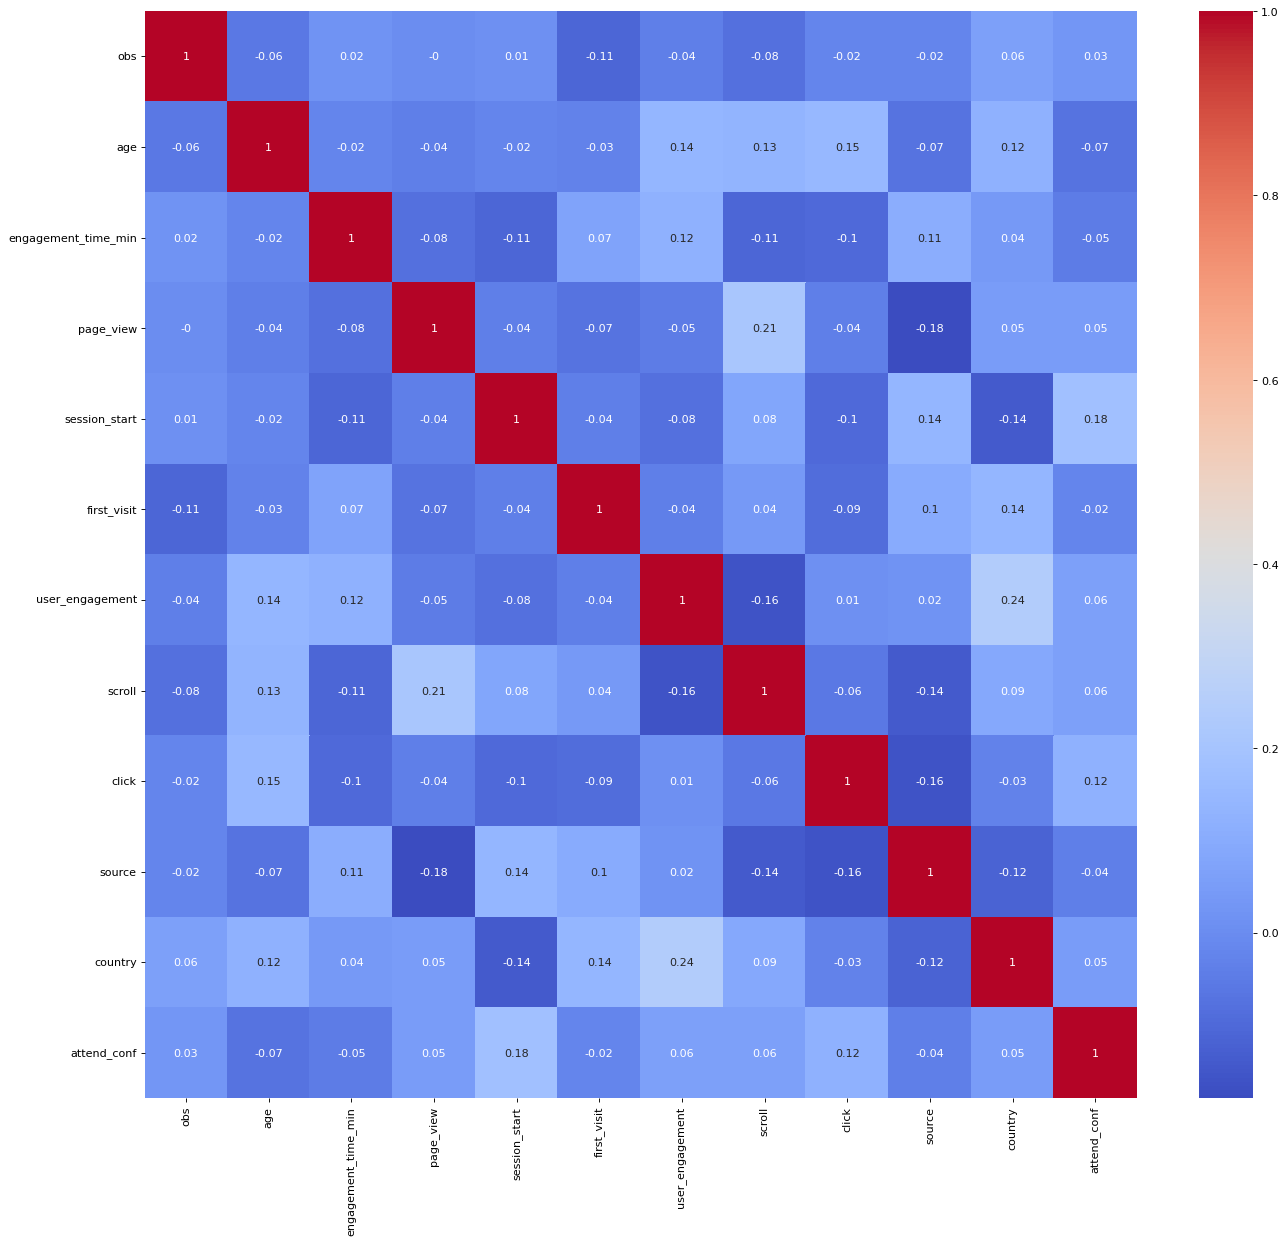

In [5]:
#Check for multicolinearity using a heatmap
figure(figsize=(20,18),dpi=80)
sns.heatmap(pd.DataFrame(data.corr(method="pearson").round(2)), annot=True, cmap='coolwarm',fmt='g')

##4. Model Building

In [7]:
#first we select the features and then split the dataset in to features(X) and target variable(y)
feature_cols = ['age','engagement_time_min', 'page_view', 'session_start', 'first_visit', 'user_engagement', 'scroll', 'click', 'source', 'country']
X= data[feature_cols]
y = data['attend_conf']

#split X and y into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=101)

#Fit and train the Logistic Regression classifier
clf1 = linear_model.LogisticRegression(C=1e40, solver='newton-cg',verbose=1)
fitted_model1 = clf1.fit(X,y)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [9]:
#run prediction result for model
pred_result = clf1.predict(X_test)
pred_result

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0])

In [10]:
#Evaluate the model performance using a confusion matrix
confus_matrix  = metrics.confusion_matrix(y_test, pred_result)
confus_matrix 

array([[ 6,  5],
       [ 4, 10]])

Text(0.5, 257.44, 'Predicted')

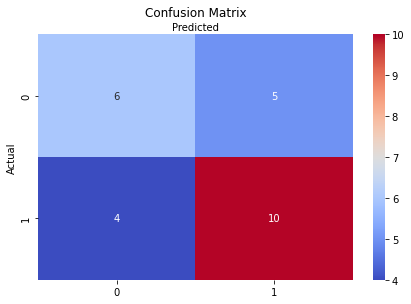

In [11]:
#Visualization of the confusion matrix using a heatmap
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(confus_matrix), annot=True, cmap='coolwarm',fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [13]:
#Other Performance measures for Model 1
# Model Accuracy
print("Accuracy:" ,metrics.accuracy_score(y_test, pred_result))
# Model Precision
print("Precision:" ,metrics.precision_score(y_test, pred_result))
# Model Recall
print("Recall:" ,metrics.recall_score(y_test, pred_result))

Accuracy: 0.64
Precision: 0.6666666666666666
Recall: 0.7142857142857143


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'Receiver Operating Characteristic Curve')

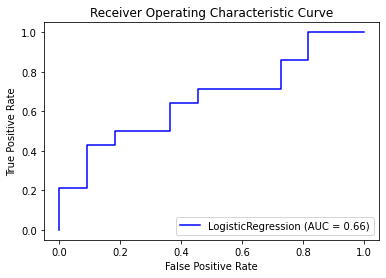

In [15]:
from sklearn.metrics._plot.roc_curve import plot_roc_curve
#ROC curve 
plot_roc_curve(fitted_model1,X_test, y_test,color="blue")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic Curve")